In [1]:
import random

import networkx as nx
import numpy as np
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

from tspqaoa.optimization import get_optimized_angles
from tspqaoa.qaoa import *


In [2]:
from time import process_time, time 

In [3]:

def get_tsp_expectation_value_method(G, pen, i_n,
                                     translate=None,
                                     init_state=None,
                                     device="GPU"):
    
    """
    Runs parametrized circuit
    
    Args:
        G: networkx graph
        pen: int
            penalty for wrong formatted paths
        init_state: string
            initial state in the onehot encoding
    
    Returns :
        execute_circ method
    """
    
    #backend = Aer.get_backend('qasm_simulator')
    aersim = AerSimulator(device=device)
    
    def execute_circ(angles):
        n = len(angles)
        assert n%2 == 0
        beta = angles[0:int(n/2)]
        gamma = angles[int(n/2):n]
        time_i = time()
        qc = get_tsp_qaoa_circuit(G, beta, gamma, translate=translate, init_state=init_state)
        time_build = time() - time_i
        print("circuit building time : ", time_build )

        qc.measure_all()
        #counts = backend.run(qc).result().get_counts()
        time_i = time()
        counts = execute(qc, aersim).result().get_counts()
        time_ex = time()- time_i
        print("circuit execution time : ", time_ex)

        
        return compute_tsp_cost_expectation(counts, G, pen, i_n, translate=translate)
    
    return execute_circ

In [18]:
ex = get_tsp_expectation_value_method(G, pen, i_n= 4, device='CPU')

In [19]:
ex(x0)

circuit building time :  377.78664565086365
circuit execution time :  236.99920344352722


TypeError: 'int' object is not iterable

In [21]:
ex = get_tsp_expectation_value_method(G, pen, i_n= 4, device='CPU')
ex(x0)

circuit building time :  3605.0026433467865


In [4]:

# build graph
G = nx.complete_graph(6)
for (u,v,w) in G.edges(data=True):
    w['weight'] = random.random()

pen = G.number_of_nodes()*10

x0 = np.ones(2) # p is inferred from len(x0)


In [5]:
ex = get_tsp_expectation_value_method(G, pen, i_n= 4, device='CPU')
ex(x0)

In [4]:
x = get_optimized_angles(G, x0, pen)

capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


KeyboardInterrupt: 

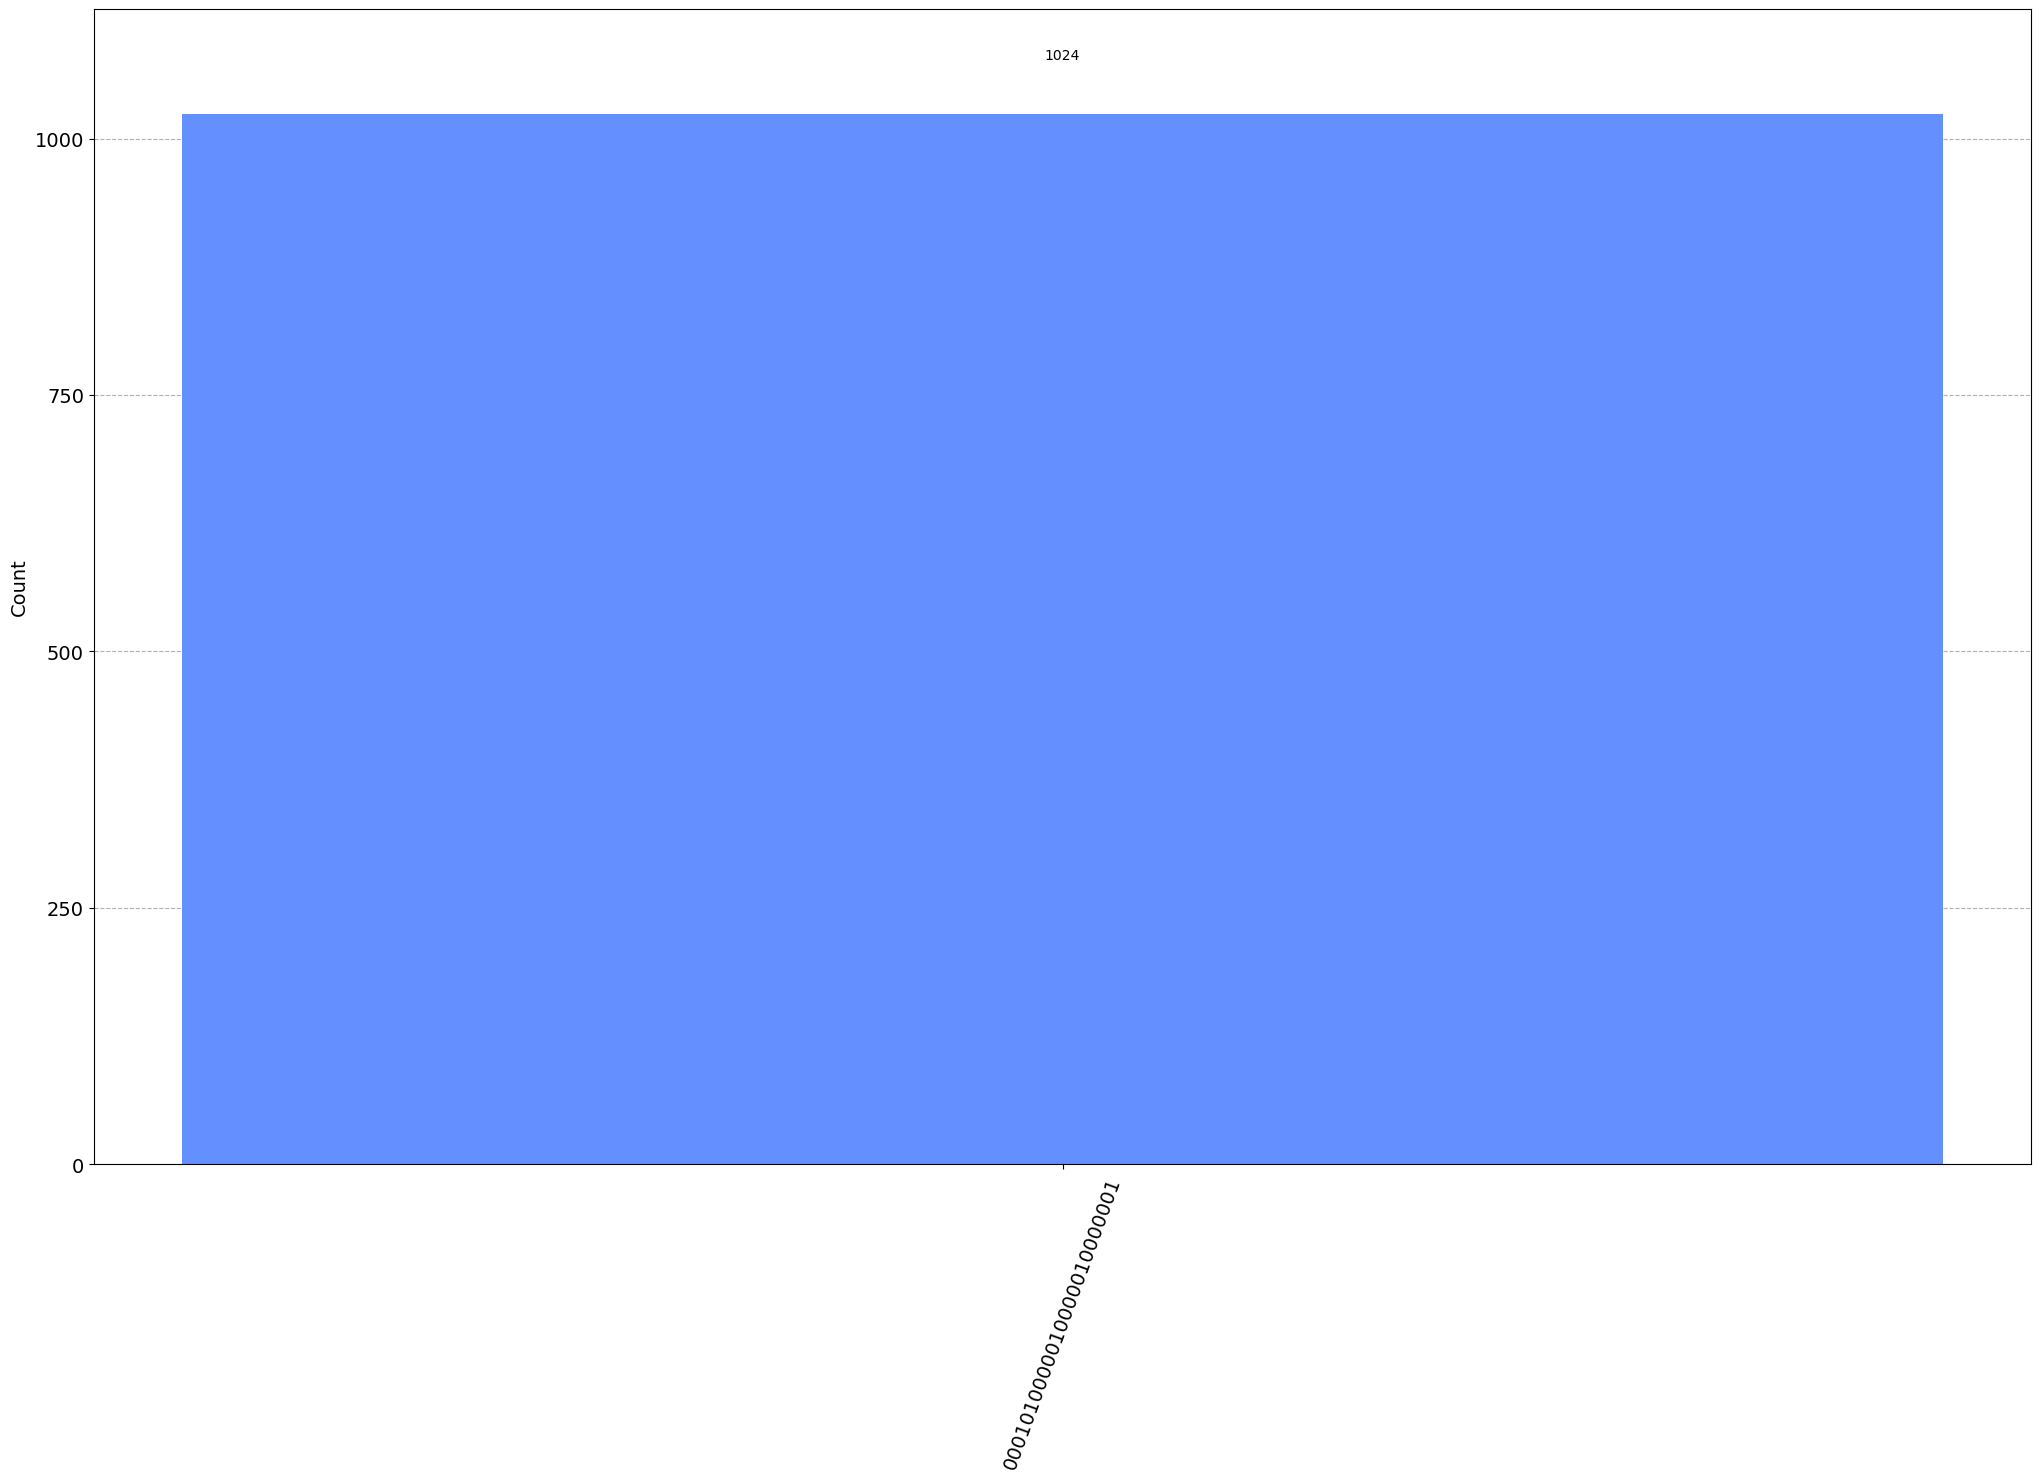

In [2]:
x = x['x']
p=len(x)
beta = x[0:int(p/2)]
gamma = x[int(p/2):p]
qc = get_tsp_qaoa_circuit(G, beta, gamma, pen=5, T1=1, T2=1)
qc.measure_all()
backend = AerSimulator()
plot_histogram(backend.run(qc).result().get_counts(), figsize=(25,15))